In [1]:
import sys  #とりあえず必要最低限のものだけ残す                                    ###kfinit（ノートブック全体）
sys.path.append('../scripts/')
from robot import *

In [2]:
class KfAgent(Agent):
    def __init__(self, time_interval, nu, omega, kf): #__init__をMclAgentからコピーしてpf->kf
        super().__init__(nu, omega)
        #self.kf = ... #self.pfをself.kfに変えてコメントアウトしておく
        self.time_interval = time_interval

<IPython.core.display.Javascript object>


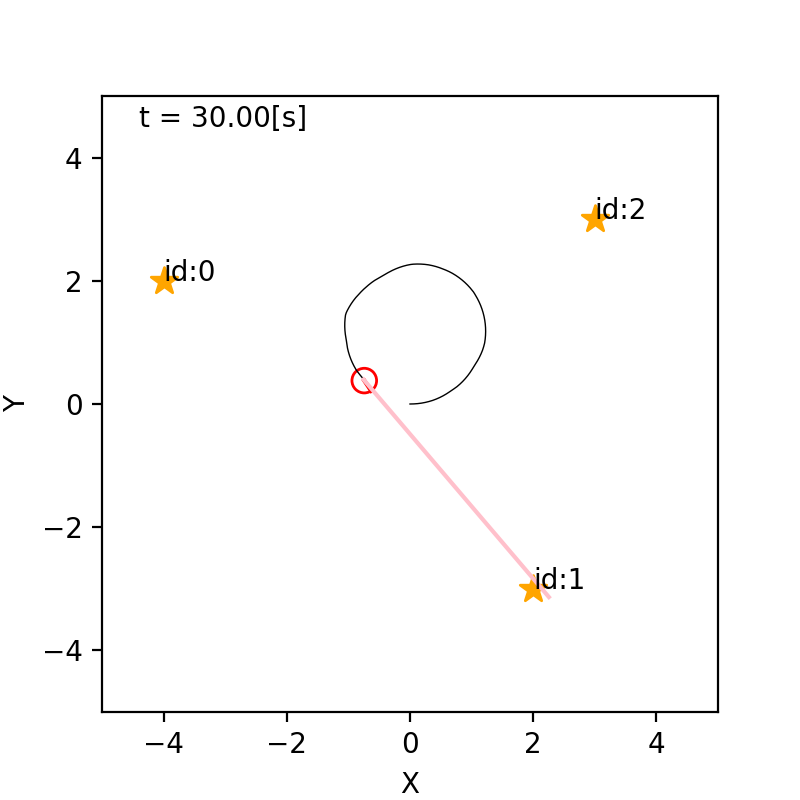

In [3]:
if __name__ == '__main__': 
    time_interval = 0.1
    world = World(30, time_interval) 

    ### 地図を生成して3つランドマークを追加 ###
    m = Map()                                  
    m.append_landmark(Landmark(-4,2))
    m.append_landmark(Landmark(2,-3))
    m.append_landmark(Landmark(3,3))
    world.append(m)          

    ### ロボットを作る ###
    initial_pose = np.array([0, 0, 0]).T
    circling = KfAgent(time_interval, 0.2, 10.0/180*math.pi, None)    #引数kfをNoneに
    r = Robot(initial_pose, sensor=Camera(m), agent=circling, color="red")
    world.append(r)

    world.draw()